In [172]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
import numpy as np
import plotly.express as px
import plotly
import activitiesdf
from datetime import timedelta
import importlib
importlib.reload(activitiesdf)

<module 'activitiesdf' from '/Users/kristofferek/Documents/git/mscthesis/src/py/activitiesdf.py'>

In [183]:
activities = activitiesdf.read_csv("sweden")

,userid,region,tweetid,createdat,latitude,longitude,month,weekday,hourofday,timezone,geometry,tweet_count,quantile,label
0,5616,0,306814580301119488,2013-02-27 18:14:30+01:00,57.599221,18.436371,2.0,3.0,18.0,Europe/Stockholm,POINT (18.43637 57.59922),2171,"(2076.0, 4778.0]",other
1,5616,0,596331871241379840,2015-05-07 17:12:52+02:00,57.599221,18.436371,5.0,4.0,17.0,Europe/Stockholm,POINT (18.43637 57.59922),2171,"(2076.0, 4778.0]",other
2,5616,0,623057810864111616,2015-07-20 11:12:12+02:00,57.599221,18.436371,7.0,1.0,11.0,Europe/Stockholm,POINT (18.43637 57.59922),2171,"(2076.0, 4778.0]",other
3,5616,0,679673567416565760,2015-12-23 15:43:00+01:00,57.599221,18.436371,12.0,3.0,15.0,Europe/Stockholm,POINT (18.43637 57.59922),2171,"(2076.0, 4778.0]",other
4,5616,0,757647103011262465,2016-07-25 20:42:00+02:00,57.599221,18.436371,7.0,1.0,20.0,Europe/Stockholm,POINT (18.43637 57.59922),2171,"(2076.0, 4778.0]",other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276010,806822309478727680,7,815619064613609472,2017-01-01 19:01:53+01:00,57.716700,12.916700,1.0,0.0,19.0,Europe/Stockholm,POINT (12.91670 57.71670),44,"(4.999, 179.0]",other
1276011,806822309478727680,7,815835652486938624,2017-01-02 09:22:31+01:00,57.716700,12.916700,1.0,1.0,9.0,Europe/Stockholm,POINT (12.91670 57.71670),44,"(4.999, 179.0]",other
1276012,806822309478727680,7,815937364736380928,2017-01-02 16:06:41+01:00,57.716700,12.916700,1.0,1.0,16.0,Europe/Stockholm,POINT (12.91670 57.71670),44,"(4.999, 179.0]",other
1276013,806822309478727680,8,816003760006668288,2017-01-02 20:30:31+01:00,57.730060,12.942200,1.0,1.0,20.0,Europe/Stockholm,POINT (12.94220 57.73006),44,"(4.999, 179.0]",other


In [196]:
activities['label'] = 'other'

In [197]:
activities['createdat'] = pd.to_datetime(activities.createdat, utc=True)

In [198]:
acts = activities.set_index(['userid', 'region'])

### Add yearmonth column

In [199]:
acts['yearmonth'] = acts['createdat'].dt.to_period('M')


/Users/kristofferek/miniconda3/envs/mscthesis/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1099: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



## Label multiple home locations

In [200]:
acts_2 = activitiesdf.label_multiple_homes(acts)
acts_2

copying
reindex
largest cluster
region
134    121
252    115
0      114
dtype: int64
set values


createdat  \
userid             region tweetid                                        
5616               0      306814580301119488 2013-02-27 17:14:30+00:00   
                          596331871241379840 2015-05-07 15:12:52+00:00   
                          623057810864111616 2015-07-20 09:12:12+00:00   
                          679673567416565760 2015-12-23 14:43:00+00:00   
                          757647103011262465 2016-07-25 18:42:00+00:00   
...                                                                ...   
806822309478727680 7      815619064613609472 2017-01-01 18:01:53+00:00   
                          815835652486938624 2017-01-02 08:22:31+00:00   
                          815937364736380928 2017-01-02 15:06:41+00:00   
                   8      816003760006668288 2017-01-02 19:30:31+00:00   
                   9      817472176437608448 2017-01-06 20:45:29+00:00   

                                               latitude  longitude  month  \
userid             region tweetid                                           
5616               0      306814580301119488  57.599221  18.436371    2.0   
                          596331871241379840  57.599221  18.436371    5.0   
                          623057810864111616  57.599221  18.436371    7.0   
                          679673567416565760  57.599221  18.436371   12.0   
                          757647103011262465  57.599221  18.436371    7.0   
...                                                 ...        ...    ...   
806822309478727680 7      815619064613609472  57.716700  12.916700    1.0   
                          815835652486938624  57.716700  12.916700    1.0   
                          815937364736380928  57.716700  12.916700    1.0   
                   8      816003760006668288  57.730060  12.942200    1.0   
                   9      817472176437608448  56.675600  12.854990    1.0   

                                              weekday  hourofday  \
userid             region tweetid                                  
5616               0      306814580301119488      3.0       18.0   
                          596331871241379840      4.0       17.0   
                          623057810864111616      1.0       11.0   
                          679673567416565760      3.0       15.0   
                          757647103011262465      1.0       20.0   
...                                               ...        ...   
806822309478727680 7      815619064613609472      0.0       19.0   
                          815835652486938624      1.0        9.0   
                          815937364736380928      1.0       16.0   
                   8      816003760006668288      1.0       20.0   
                   9      817472176437608448      5.0       21.0   

                                                      timezone  \
userid             region tweetid                                
5616               0      306814580301119488  Europe/Stockholm   
                          596331871241379840  Europe/Stockholm   
                          623057810864111616  Europe/Stockholm   
                          679673567416565760  Europe/Stockholm   
                          757647103011262465  Europe/Stockholm   
...                                                        ...   
806822309478727680 7      815619064613609472  Europe/Stockholm   
                          815835652486938624  Europe/Stockholm   
                          815937364736380928  Europe/Stockholm   
                   8      816003760006668288  Europe/Stockholm   
                   9      817472176437608448  Europe/Stockholm   

                                                               geometry  \
userid             region tweetid                                         
5616               0      306814580301119488  POINT (18.43637 57.59922)   
                          596331871241379840  POINT (18.43637 57.59922)   
                          623057810864111616  POINT 

## Label work location

In [201]:
acts_3 = activitiesdf.label_work(acts_2)

find work place: not enough visits
done with 100
done with 200
done with 300
done with 400
done with 500
done with 600
done with 700
done with 800
done with 900
find work place: not enough visits
done with 1000
done with 1100
done with 1200
done with 1300
done with 1400
done with 1500
done with 1600
done with 1700
done with 1800
find work place: not enough visits
done with 1900
done with 2000
find work place: not enough visits
done with 2100
find work place: not enough visits
done with 2200
done with 2300
done with 2400
done with 2500
done with 2600
done with 2700
done with 2800
find work place: not enough visits
done with 2900
done with 3000
done with 3100
find work place: not enough visits
find work place: not enough visits
done with 3200
done with 3300
find work place: not enough visits
find work place: not enough visits
find work place: not enough visits
find work place: not enough visits
find work place: not enough visits
done with 3400
find work place: not enough visits
find work

## Visualise a user's labels and clusters

In [202]:
#18192787
#14079762
#85666280
user = acts_3.loc[85666280].reset_index().set_index('region')
homestr = 'Home: '+ str(np.unique(user[user['label'] == 'home'].index.values))
workstr = 'Work: '+ str(np.unique(user[user['label'] == 'work'].index.values))


### Extract the user's 10 largest clusters

In [203]:
topregions = user.groupby(['region']).size().sort_values(ascending=False).head(10)
topten = user.loc[topregions.index.values]

## Plot cluster sizes over time (monthly)

Home: [  0 134]
Work: [252]


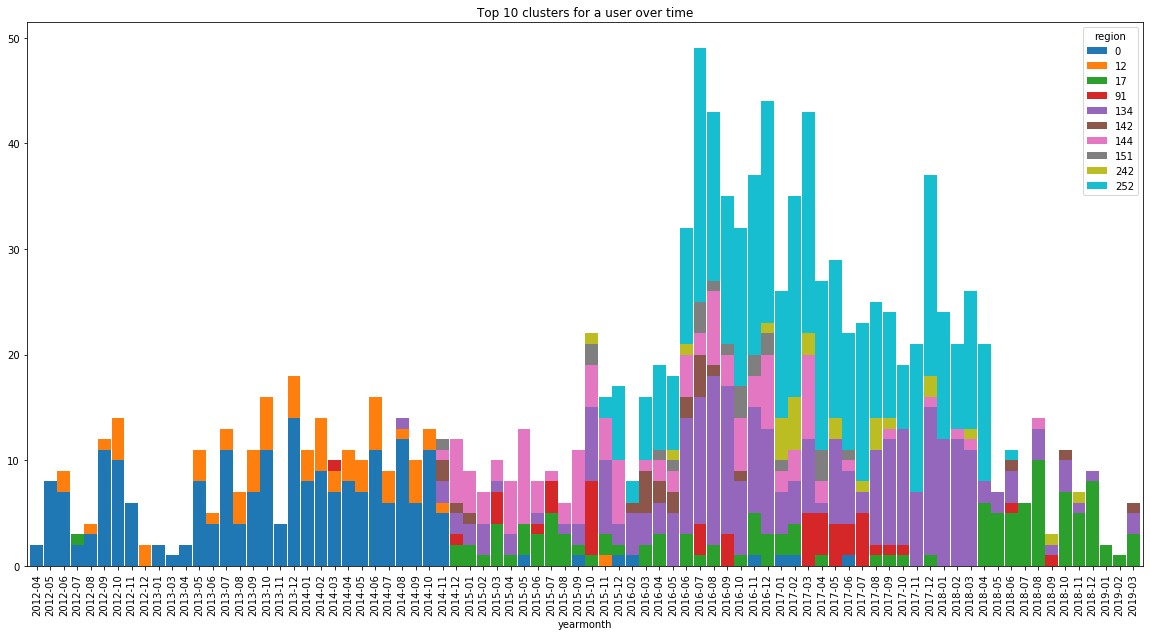

In [204]:
bars = topten.groupby(['yearmonth', 'region']).size().unstack().fillna(0).plot.bar(stacked=True, figsize=(20, 10), width=0.95)
bars.set_title("Top 10 clusters for a user over time")
print(homestr)
print(workstr)

## Scatter plot clusters on a map

In [205]:
plotly.offline.init_notebook_mode(connected=True)

In [206]:
fig = px.scatter_mapbox(topten.reset_index(), lat='latitude', lon='longitude', hover_data=['hourofday', 'weekday', 'region'], color='label')
fig.update_layout(mapbox_style="open-street-map")
fig.show()